In [1]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')


df.columns = ['label', 'message']

print(f"Total Message Number: {df.shape}")
print(df.head())

Total Message Number: (5572, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


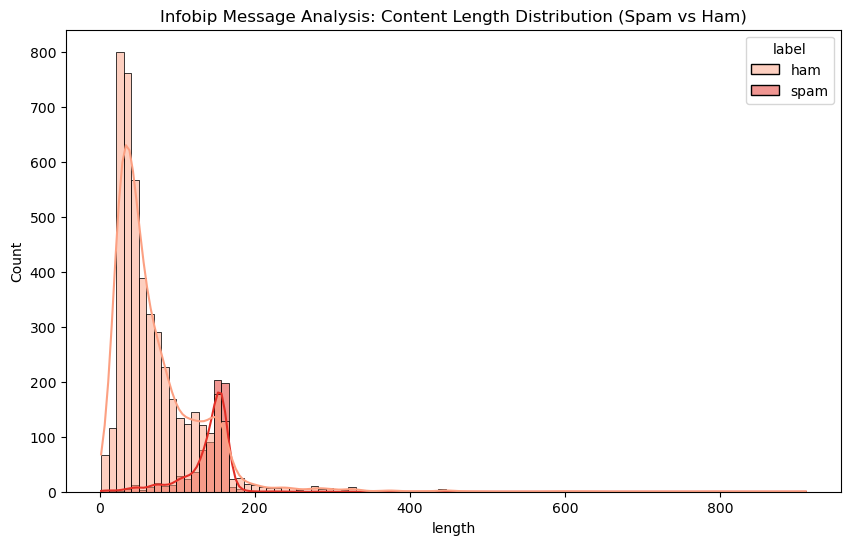

In [2]:
df['length'] = df['message'].apply(len)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='length', hue='label', palette='Reds', kde=True)
plt.title('Infobip Message Analysis: Content Length Distribution (Spam vs Ham)')
plt.show()




In [5]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


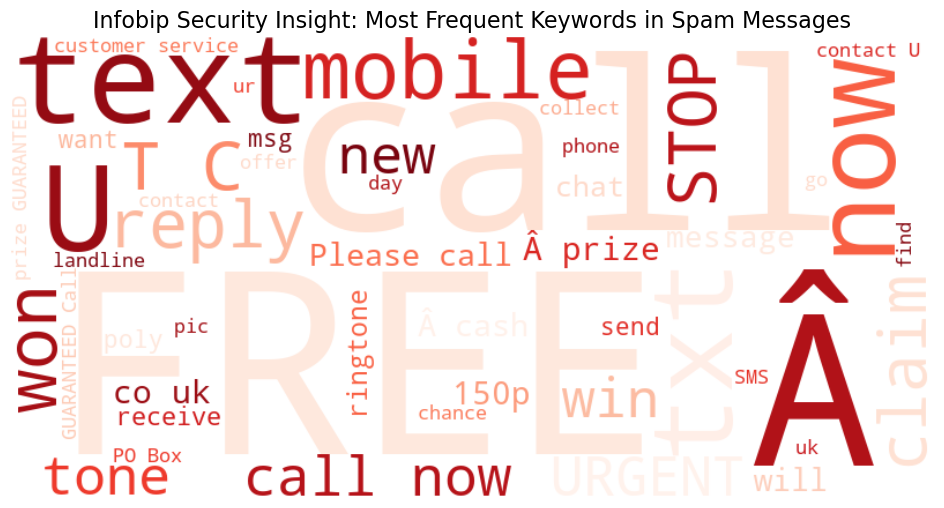

In [3]:
from wordcloud import WordCloud

spam_messages = " ".join(df[df['label'] == 'spam']['message'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds', max_words=50).generate(spam_messages)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Infobip Security Insight: Most Frequent Keywords in Spam Messages', fontsize=16)
plt.show()

wordcloud.to_file("infobip_scam_cloud.png")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [5]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['message'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Model Accuracy Rate: %{accuracy_score(y_test, y_pred)*100:.2f}")
print("\nInfobip Detailed Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy Rate: %98.57

Infobip Detailed Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



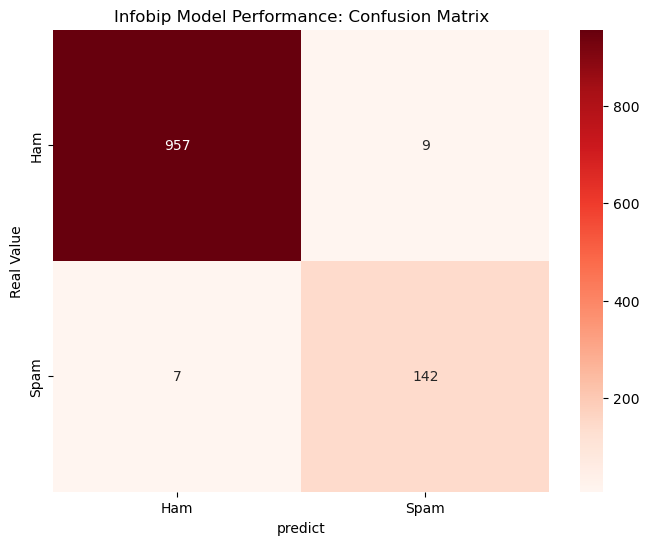

<Figure size 640x480 with 0 Axes>

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Real Value')
plt.xlabel('predict')
plt.title('Infobip Model Performance: Confusion Matrix')
plt.show()

plt.savefig('infobip_confusion_matrix.png')

            

'plots' create file.


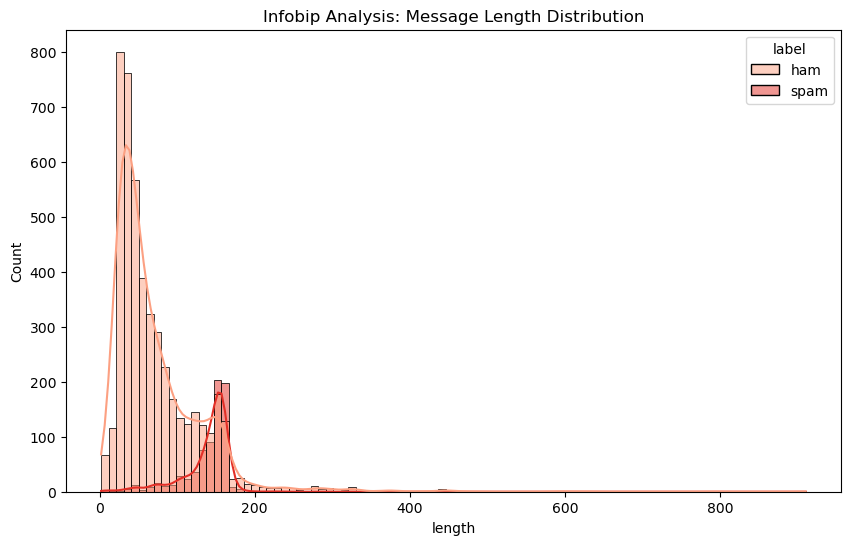

The graph was recorded: plots/infobip_length_dist.png


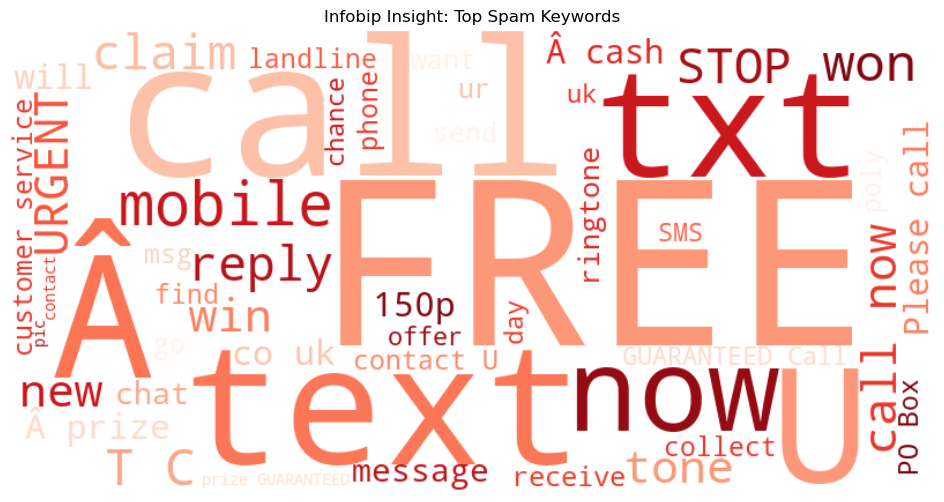

The graph was recorded: plots/infobip_spam_cloud.png


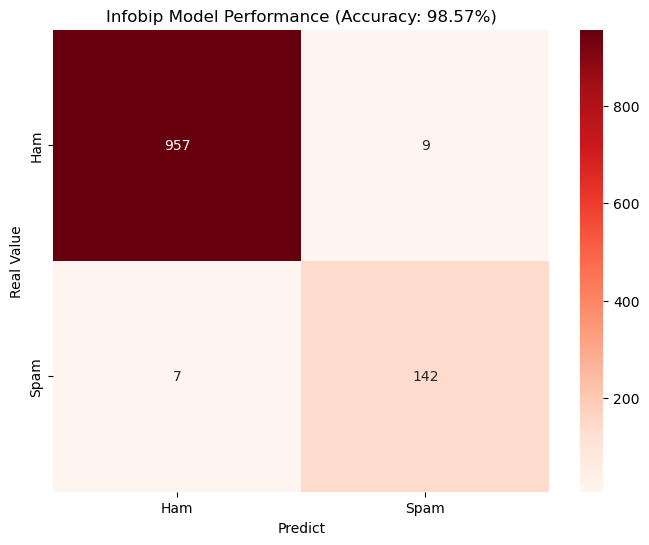

The graph was recorded: plots/infobip_confusion_matrix.png

 All images have been saved.


In [7]:
import os 

if not os.path.exists('plots'):
    os.makedirs('plots')
    print("'plots' create file.")

# graphic
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='length', hue='label', palette='Reds', kde=True)
plt.title('Infobip Analysis: Message Length Distribution')
plt.savefig('plots/infobip_length_dist.png', dpi=300)
plt.show()
print("The graph was recorded: plots/infobip_length_dist.png")

spam_words = " ".join(df[df['label'] == 'spam']['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds', max_words=50).generate(spam_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Infobip Insight: Top Spam Keywords')
wordcloud.to_file('plots/infobip_spam_cloud.png')
plt.show()
print("The graph was recorded: plots/infobip_spam_cloud.png")

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.ylabel('Real Value')
plt.xlabel('Predict')
plt.title('Infobip Model Performance (Accuracy: 98.57%)')
plt.savefig('plots/infobip_confusion_matrix.png', dpi=300)
plt.show()
print("The graph was recorded: plots/infobip_confusion_matrix.png")
print("\n All images have been saved.")